# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}&appid={weather_api_key}&units=metric'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng =  city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | kapa'a
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | rebrikha
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | poblacion, san felipe
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | pombal
Processing Record 10 of Set 1 | isla mujeres
Processing Record 11 of Set 1 | puerto armuelles
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | pitimbu
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | dakhla
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | ig

City not found. Skipping...
Processing Record 10 of Set 8 | isla mujeres
City not found. Skipping...
Processing Record 11 of Set 8 | oltinko'l
City not found. Skipping...
Processing Record 12 of Set 8 | molde
City not found. Skipping...
Processing Record 13 of Set 8 | narrabri
City not found. Skipping...
Processing Record 14 of Set 8 | olot shahri
City not found. Skipping...
Processing Record 15 of Set 8 | vilyuchinsk
City not found. Skipping...
Processing Record 16 of Set 8 | champerico
City not found. Skipping...
Processing Record 17 of Set 8 | hihifo
City not found. Skipping...
Processing Record 18 of Set 8 | kapshagay
City not found. Skipping...
Processing Record 19 of Set 8 | baoqing
City not found. Skipping...
Processing Record 20 of Set 8 | mitchell
City not found. Skipping...
Processing Record 21 of Set 8 | khandyga
City not found. Skipping...
Processing Record 22 of Set 8 | bijapur
City not found. Skipping...
Processing Record 23 of Set 8 | sisimiut
City not found. Skipping...

City not found. Skipping...
Processing Record 27 of Set 10 | tadine
City not found. Skipping...
Processing Record 28 of Set 10 | gretna
City not found. Skipping...
Processing Record 29 of Set 10 | bandarbeyla
City not found. Skipping...
Processing Record 30 of Set 10 | kuressaare
City not found. Skipping...
Processing Record 31 of Set 10 | neon karlovasion
City not found. Skipping...
Processing Record 32 of Set 10 | ciamis
City not found. Skipping...
Processing Record 33 of Set 10 | svetlogorsk
City not found. Skipping...
Processing Record 34 of Set 10 | alofi
City not found. Skipping...
Processing Record 35 of Set 10 | douentza
City not found. Skipping...
Processing Record 36 of Set 10 | bubaque
City not found. Skipping...
Processing Record 37 of Set 10 | olgii
City not found. Skipping...
Processing Record 38 of Set 10 | chernyshevsk
City not found. Skipping...
Processing Record 39 of Set 10 | nishinoomote
City not found. Skipping...
Processing Record 40 of Set 10 | tazacorte
City not

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,8.65,56,24,2.07,GS,1707282271
1,kapa'a,22.0752,-159.3190,22.83,67,19,3.58,US,1707282093
2,waitangi,-43.9535,-176.5597,18.79,90,100,4.47,NZ,1707282271
3,rebrikha,53.0733,82.3408,-6.87,87,88,3.04,RU,1707282271
4,isafjordur,66.0755,-23.1240,-2.87,90,100,5.94,IS,1707282272


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,8.65,56,24,2.07,GS,1707282271
1,kapa'a,22.0752,-159.3190,22.83,67,19,3.58,US,1707282093
2,waitangi,-43.9535,-176.5597,18.79,90,100,4.47,NZ,1707282271
3,rebrikha,53.0733,82.3408,-6.87,87,88,3.04,RU,1707282271
4,isafjordur,66.0755,-23.1240,-2.87,90,100,5.94,IS,1707282272


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

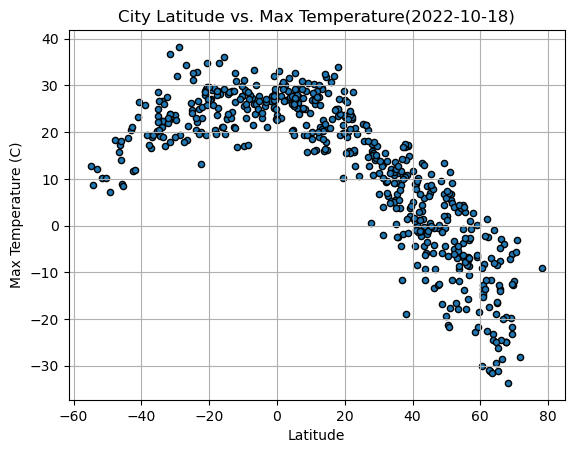

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ['Lat'], y = ['Max Temp'], marker='o', grid = True, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

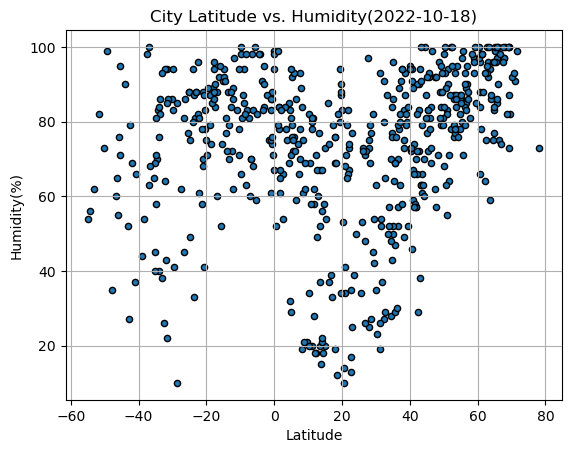

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = ['Lat'], y = ['Humidity'], marker='o', grid = True, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

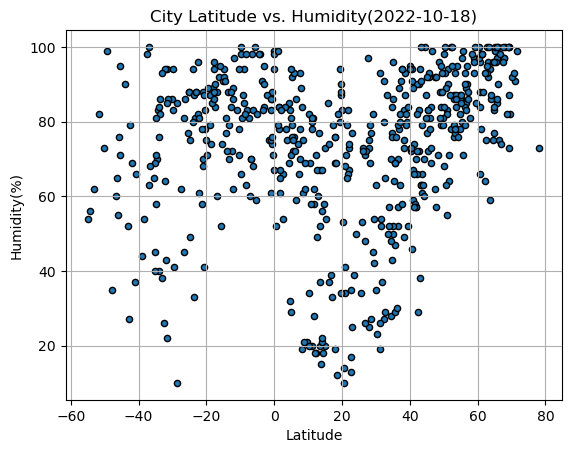

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = ['Lat'], y = ['Humidity'], marker='o', grid = True, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

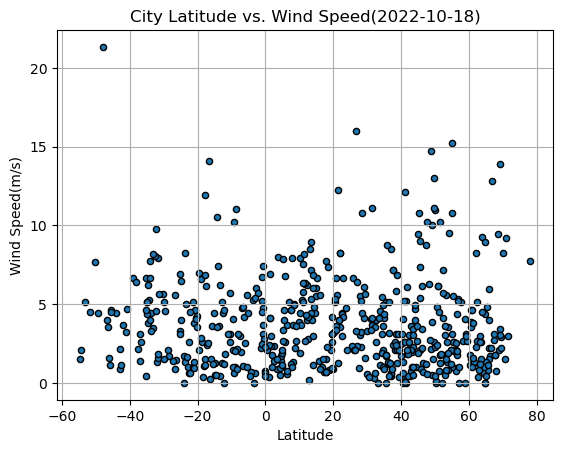

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = ['Lat'], y = ['Wind Speed'], marker='o', grid = True, edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapa'a,22.0752,-159.3190,22.83,67,19,3.58,US,1707282093
3,rebrikha,53.0733,82.3408,-6.87,87,88,3.04,RU,1707282271
4,isafjordur,66.0755,-23.1240,-2.87,90,100,5.94,IS,1707282272
6,"poblacion, san felipe",14.5665,121.0308,31.72,58,40,4.47,PH,1707282272
9,isla mujeres,21.2311,-86.7310,16.03,71,18,5.59,MX,1707282272


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']< 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,8.65,56,24,2.07,GS,1707282271
2,waitangi,-43.9535,-176.5597,18.79,90,100,4.47,NZ,1707282271
5,punta arenas,-53.1500,-70.9167,12.06,62,75,5.14,CL,1707282272
7,puerto natales,-51.7236,-72.4875,10.27,82,88,4.50,CL,1707282272
8,pombal,-6.7703,-37.8017,26.08,70,46,4.79,BR,1707282272


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8017135929132836


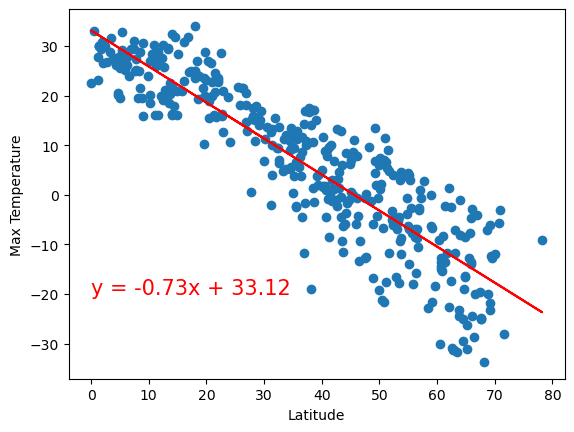

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0,-20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3107418508591961


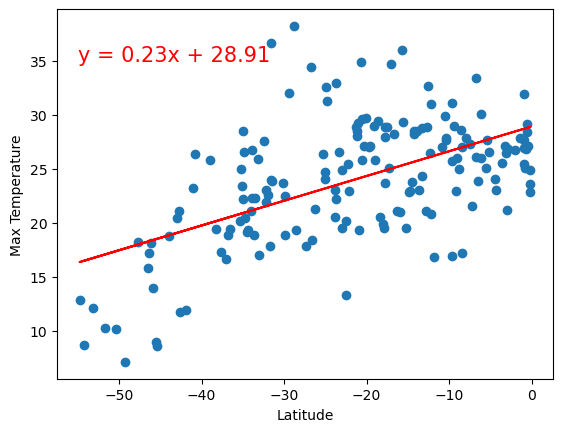

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-55,35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** A r-squared value of 0.8017135929132836 for the Northern Hemisphere suggests that approximately 80.17% of the variance in Max Temperature can be explained by Latitude in the Northern Hemisphere. And a r-squared value of 0.3107418508591961 for the Southern Hemisphere suggests that approximately 31.07% of the variance in Max Temperature can be explained by Latitude in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.23152328836766567


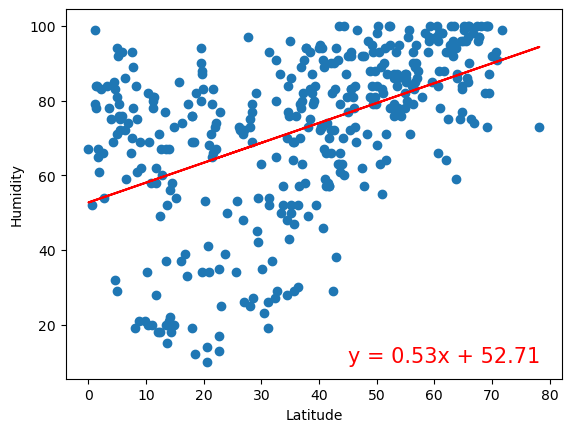

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(45,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.14389426060697127


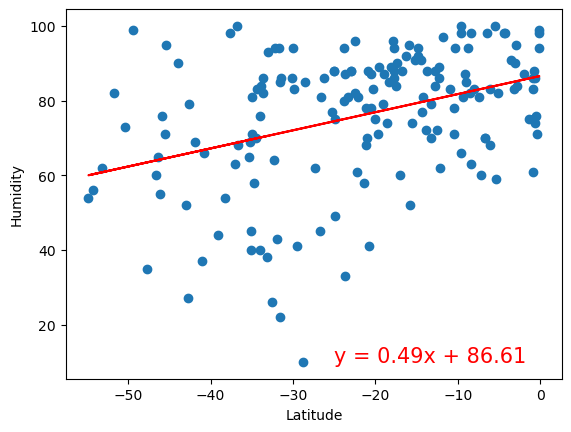

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-25,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** A r-squared value of 0.23152328836766567 for the Northern Hemisphere suggests that approximately 23.15% of the variance in Humidity can be explained by Latitude in the Northern Hemisphere. And a r-squared value of 0.14389426060697127 for the Southern Hemisphere suggests that approximately 14.38% of the variance in Humidity can be explained by Latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.10376531415480963


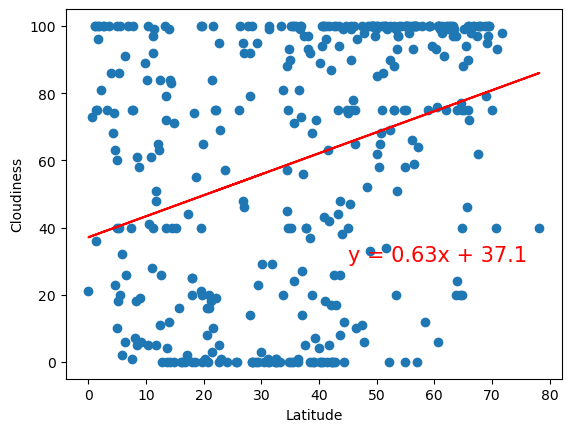

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(45,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07962098104095612


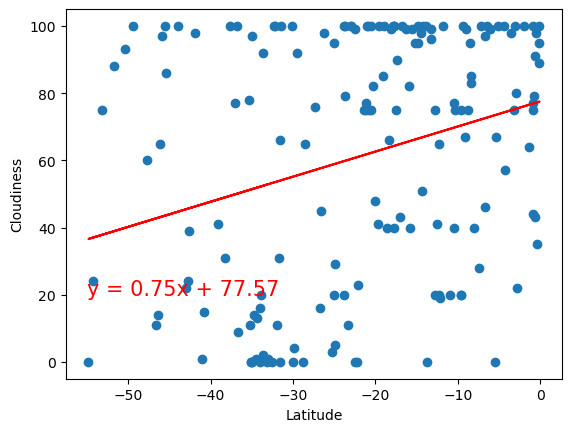

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-55,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** A r-squared value of 0.10376531415480963 for the Northern Hemisphere suggests that approximately 10.37% of the variance in Cloudiness can be explained by Latitude in the Northern Hemisphere. And a r-squared value of 0.07962098104095612 for the Southern Hemisphere suggests that approximately 7.96% of the variance in Cloudiness can be explained by Latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0006243955493141787


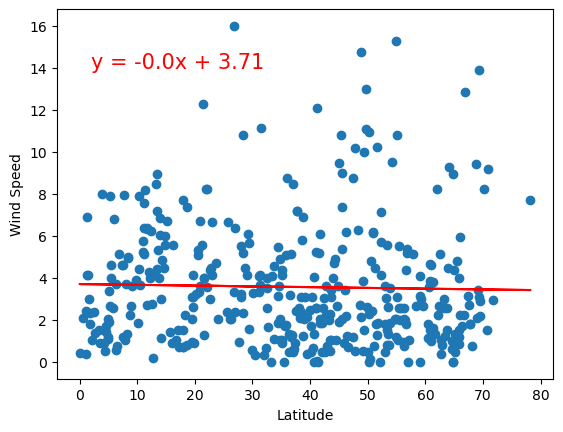

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(2,14), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01956668805339687


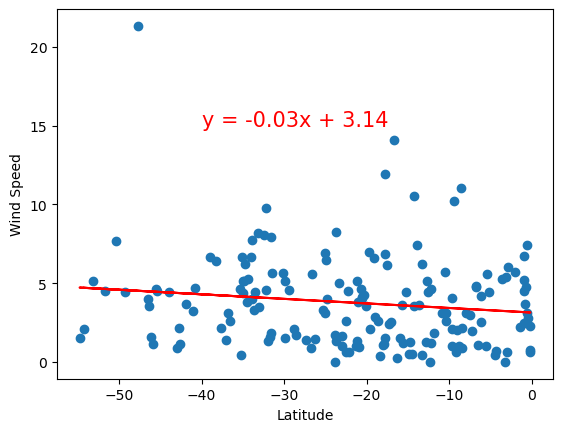

In [24]:
# Southern Hemisphere
# Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-40,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** A r-squared value of 0.0006243955493141787 for the Northern Hemisphere suggests that approximately 0.0624% of the variance in Wind Speed can be explained by Latitude in the Northern Hemisphere. There's little linear relationship between Latitude and Wind Speed in this case. And a r-squared value of 0.01956668805339687 for the Southern Hemisphere suggests that approximately 1.95% of the variance in Wind Speed can be explained by Latitude in the Southern Hemisphere.
